In [ ]:
  !nvidia-smi

Sat Mar  1 05:07:47 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   39C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
from flask import Flask, request, jsonify
import torch
from PIL import Image
import io

app = Flask(__name__)

# Load your model (adjust based on your actual model)
model = torch.hub.load('ultralytics/yolov5', 'custom', path='your_model_path.pt')

@app.route('/predict', methods=['POST'])
def predict():
    if 'file' not in request.files:
        return jsonify({'error': 'No file provided'}), 400

    file = request.files['file']
    image = Image.open(io.BytesIO(file.read()))

    # Perform inference
    results = model(image)
    detections = results.pandas().xyxy[0].to_dict(orient="records")  # Convert to readable format

    return jsonify({'detections': detections})

if __name__ == '__main__':
    app.run(host='0.0.0.0', port=5000)


/usr/local/lib/python3.11/dist-packages/torch/hub.py:330: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


YOLOv5 🚀 2025-3-1 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)



Exception: [Errno 2] No such file or directory: 'your_model_path.pt'. Cache may be out of date, try `force_reload=True` or see https://docs.ultralytics.com/yolov5/tutorials/pytorch_hub_model_loading for help.

In [ ]:
!pip install --upgrade pip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 29.0 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2


In [ ]:
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 922.1/922.1 kB 30.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 59.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 122.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 131.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 30.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 59.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 64.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 68.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 138.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    U

In [ ]:
%cd /content
!unzip Med_Data.zip -d dataset/


/content
Archive:  Med_Data.zip
 extracting: dataset/README.dataset.txt  
 extracting: dataset/README.roboflow.txt  
 extracting: dataset/data.yaml       
   creating: dataset/test/
   creating: dataset/test/images/
 extracting: dataset/test/images/BANDAGE-106-_jpg.rf.4abd15879cada84c36ca74403efa52a7.jpg  
 extracting: dataset/test/images/BANDAGE-118-_jpg.rf.6f59c1ef0c585f50b52fada3901e2bb8.jpg  
 extracting: dataset/test/images/BANDAGE-14-_jpg.rf.99422e6f44a610583da034e08d188dca.jpg  
 extracting: dataset/test/images/BANDAGE-17-_jpg.rf.9d05ccc379c567e2ad17053086f261ef.jpg  
 extracting: dataset/test/images/BANDAGE-186-_jpg.rf.b52f1d2cf865a555561f5c69ebfb35c3.jpg  
 extracting: dataset/test/images/BANDAGE-205-_jpg.rf.f931e8d809e8e69bb7784290c5a8aec3.jpg  
 extracting: dataset/test/images/BANDAGE-225-_jpg.rf.2302bb63897fd1eef20d531fd088cbeb.jpg  
 extracting: dataset/test/images/BANDAGE-232-_jpg.rf.619ea2bf0a4a201c2ca85793d402769d.jpg  
 extracting: dataset/test/images/BANDAGE-235-_jpg.

In [ ]:
!yolo detect train data=/content/dataset/data.yaml model=yolov8x.pt epochs=40 imgsz=640

Ultralytics 8.3.81 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=/content/dataset/data.yaml, epochs=40, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxe

In [ ]:
!yolo detect train \
  model=/content/runs/detect/train2/weights/best.pt \
  data=/content/dataset/data.yaml \
  epochs=10

Ultralytics 8.3.81 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=/content/runs/detect/train2/weights/best.pt, data=/content/dataset/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_label

In [ ]:
!yolo detect val model=/content/runs/detect/train4/weights/best.pt data=/content/dataset/data.yaml


Ultralytics 8.3.81 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 112 layers, 68,135,124 parameters, 0 gradients, 257.4 GFLOPs
val: Scanning /content/dataset/valid/labels.cache... 179 images, 9 backgrounds, 0 corrupt: 100% 179/179 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 12/12 [00:11<00:00,  1.01it/s]
                   all        179        486      0.751      0.549      0.599       0.44
                IVtube         22         25      0.672      0.491      0.575       0.39
               bandage         31        112      0.862      0.839       0.92      0.815
                cotton         25        115       0.67      0.583      0.628      0.399
                gloves         43         78      0.775      0.462      0.576      0.425
                  mask         17         24      0.823      0.583      0.651      0.418
           medical cap          5          7       0.

In [ ]:
!yolo detect predict model=/content/runs/detect/train4/weights/best.pt source=/content/dataset/valid/images save=True

Ultralytics 8.3.81 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 112 layers, 68,135,124 parameters, 0 gradients, 257.4 GFLOPs

image 1/179 /content/dataset/valid/images/Ambidextrous-Latex-Disposable-Medical-Gloves-_-Natural_jpg.rf.31a93abda10157bca15ac5ee6576eb8d.jpg: 640x640 1 gloves, 90.3ms
image 2/179 /content/dataset/valid/images/BANDAGE-105-_jpg.rf.4158892461c771073f72519609f38bd1.jpg: 640x640 8 bandages, 74.3ms
image 3/179 /content/dataset/valid/images/BANDAGE-117-_jpg.rf.2adf5a5c9117d5ce55bcde77d0c0e770.jpg: 640x640 9 bandages, 74.1ms
image 4/179 /content/dataset/valid/images/BANDAGE-121-_jpg.rf.28a94d97e21566bec0d78736a59c185d.jpg: 640x640 3 bandages, 74.2ms
image 5/179 /content/dataset/valid/images/BANDAGE-128-_jpg.rf.efbfd84371789369a28d1502aa33e582.jpg: 640x640 1 cotton, 62.4ms
image 6/179 /content/dataset/valid/images/BANDAGE-129-_jpg.rf.aa25ec179c5316879f61b2c7eb3ca5df.jpg: 640x640 11 bandages, 54.4ms
image 7/179 /content/dataset/val

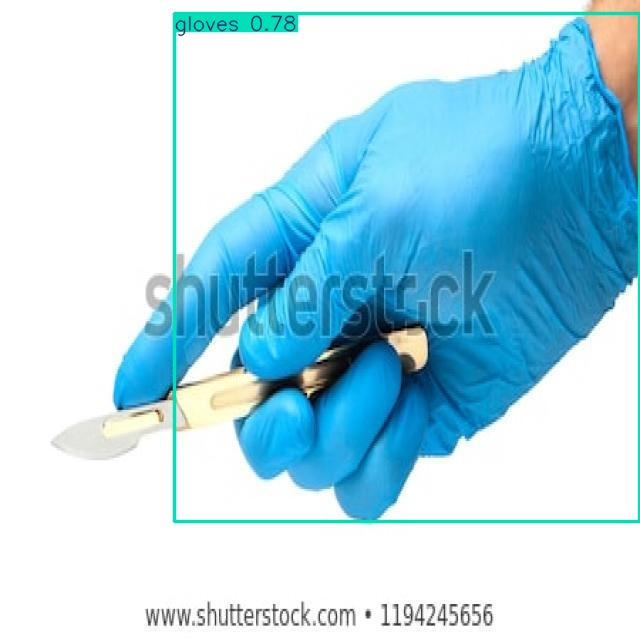

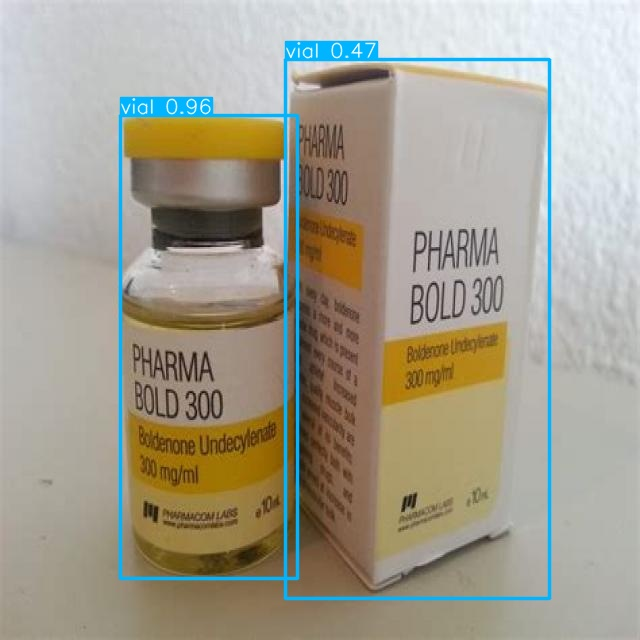

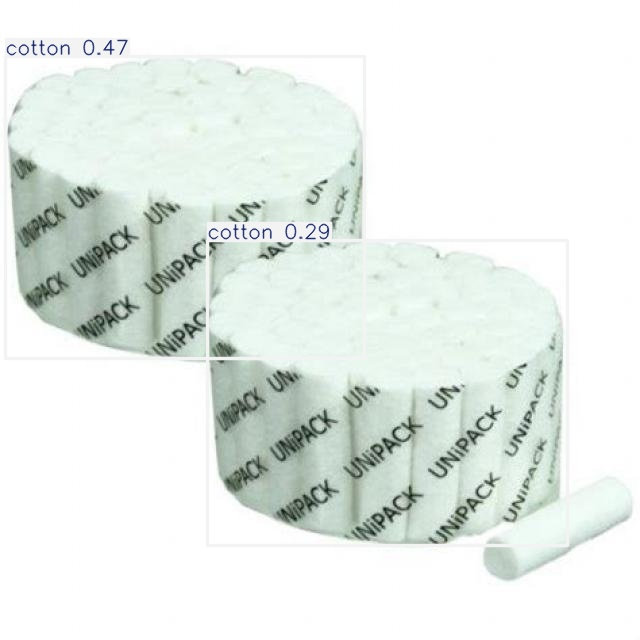

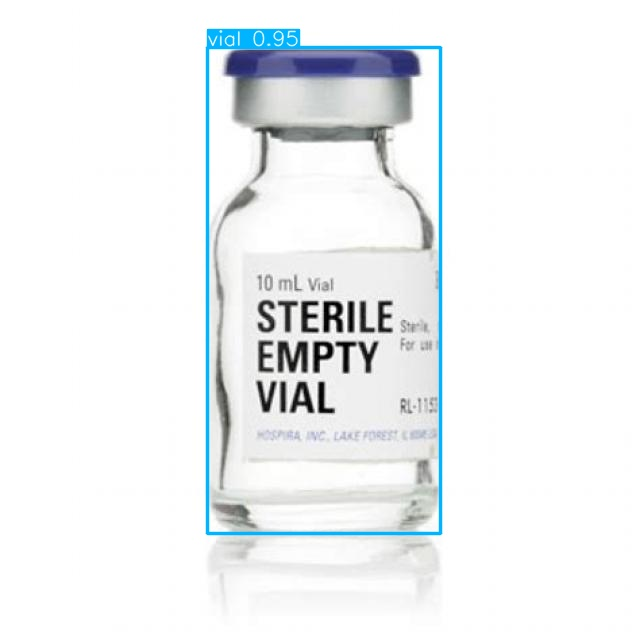

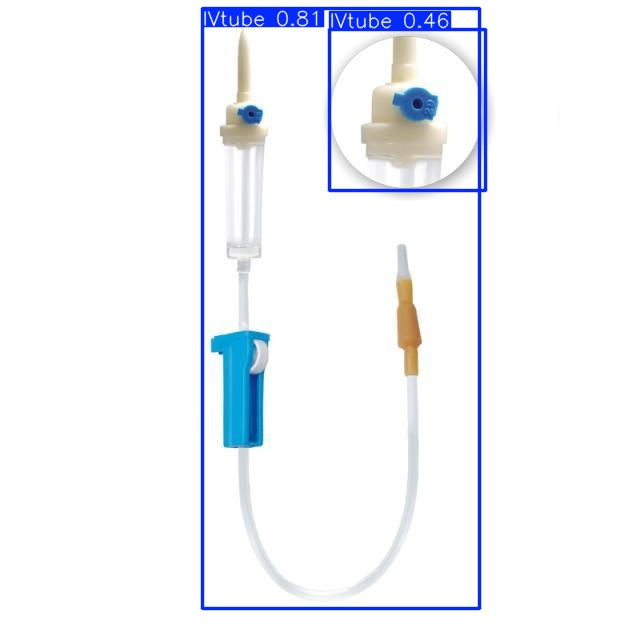

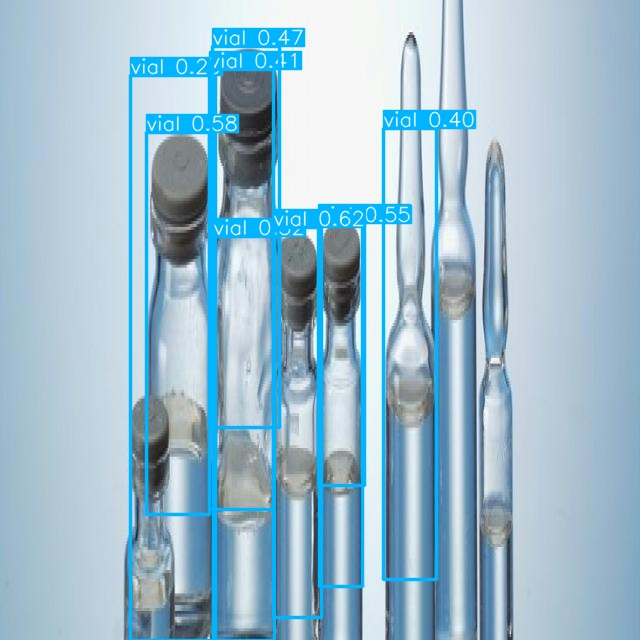

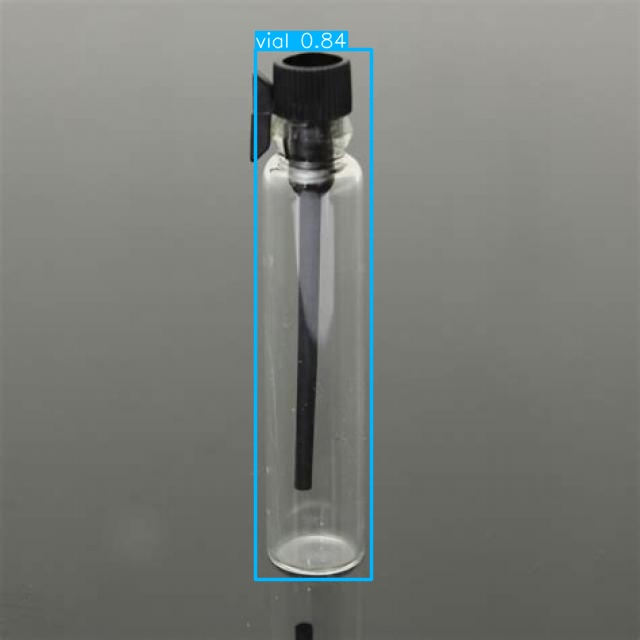

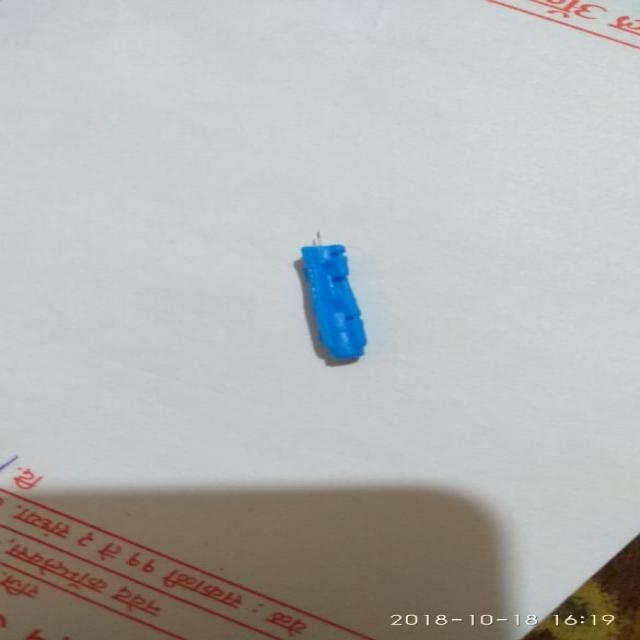

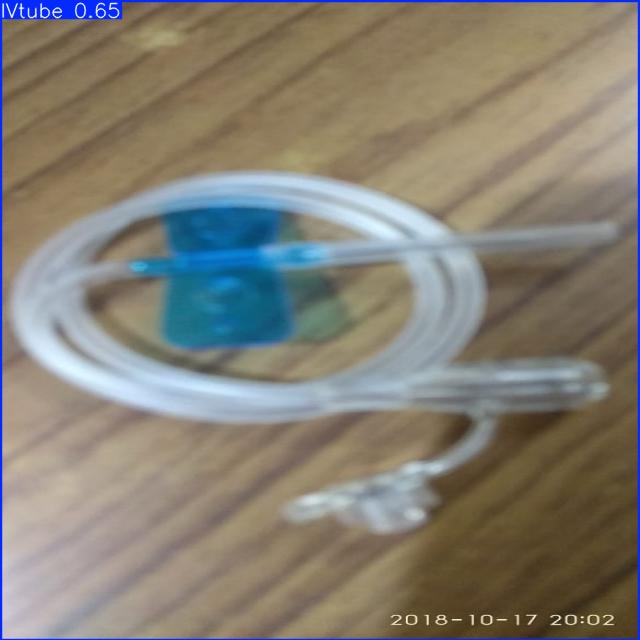

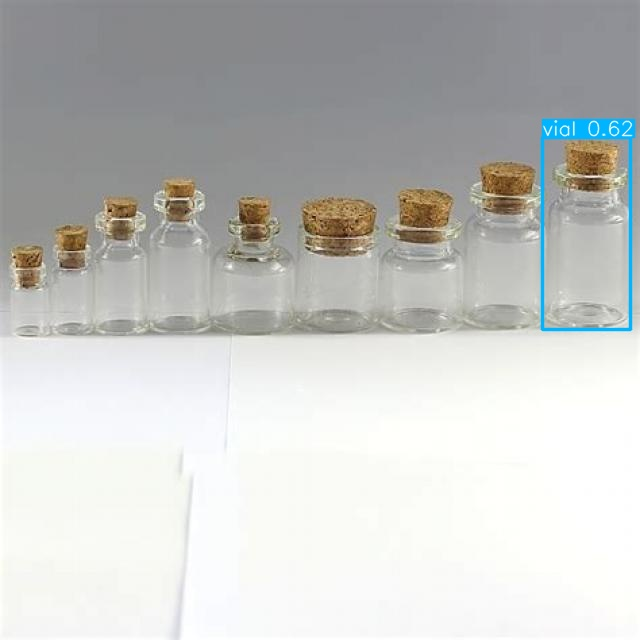

In [ ]:
import glob
from IPython.display import Image, display
for image_path in glob.glob(f'/content/runs/detect/predict/*.jpg')[:10]:
  display(Image(filename=image_path))